***introduction***

Attribute Information dataset jenis penyakit gagal jantung:
1. *`age`* - umur pasien
2. *`anaemia`* - apakah ada pengurangan haemoglobin
3. *`creatinine_phosphokinase`* - level enzim CPK dalam mcg/L
4. *`diabetes`* - apakah pasien punya riwayat diabetes
5. *`ejection_fraction`* - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. *`high_blood_pressure`* - apakah pasien punya darah tinggi
7. *`platelets`* - jumlah platelet di darah dalam kiloplatelets/mL
8. *`serum_creatinine`* - level serum creatinine di darah dalam mg/dL
9. *`serum_sodium`* - level serum sodium di darah dalam mEq/L
10. *`sex`* - apakah pasien pria atau wanita
11. *`smoking`* - apakah pasien merokok
12. *`time`* - waktu dalam hari untuk follow-up
13. *`DEATH_EVENT`* - apakah pasien sudah meninggal saat waktu follow-up

Kolom *`anaemia`, `diabetes`, `high_blood_pressure`, `serum_creatinie`, `sex`, `smoking`* adalah perentase jenis penyakit. Dan kolom prediksi *`DEATH_EVENT`*

>***Import Pustaka***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

>***Data Loading***

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


>***Data Cleansing***

In [3]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Proses data Preprocessing tidak dapat dilakukan, Karena data pasien tidak memiliki nilai missing value**

In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


tidak ada kolom nilai yang hilang atau status *`NaN/Missing Value`*

>***Explore data***

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [56]:
data['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

C:\Users\Thendro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


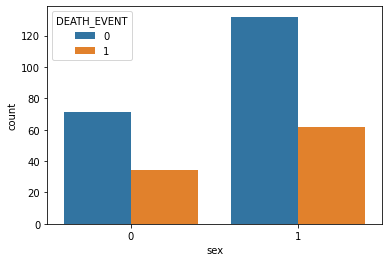

In [57]:
sns.countplot("sex", hue="DEATH_EVENT", data=data)
plt.show()

*Kesimpulan Data pasien lebih banyak yang belum meninggal saat difollow UP*

C:\Users\Thendro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


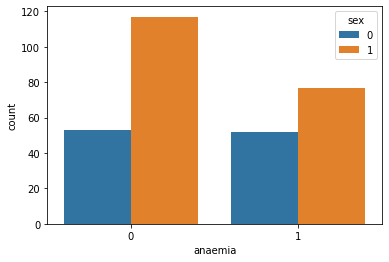

In [59]:
sns.countplot("anaemia", hue="sex", data=data)
plt.show()

C:\Users\Thendro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


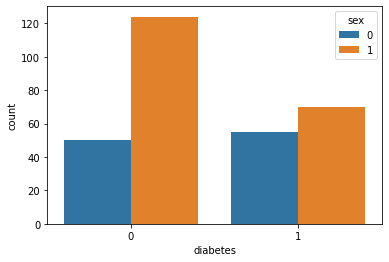

In [60]:
sns.countplot("diabetes", hue="sex", data=data)
plt.show()

C:\Users\Thendro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


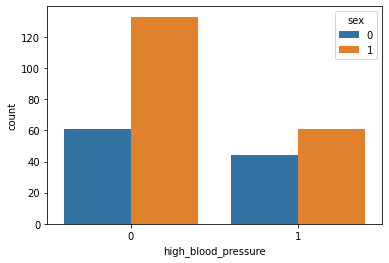

In [61]:
sns.countplot("high_blood_pressure", hue="sex", data=data)
plt.show()

C:\Users\Thendro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


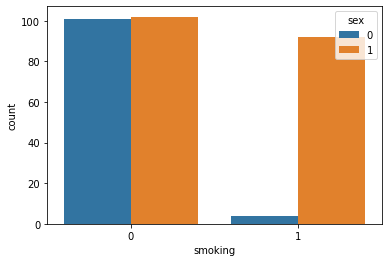

In [62]:
sns.countplot("smoking", hue="sex", data=data)
plt.show()

*Kesimpulan Data pasien `1` atau laki laki lebih banyak.*

In [67]:
platelets = data['platelets'].groupby(data['age'], axis=0).mean().sort_values()

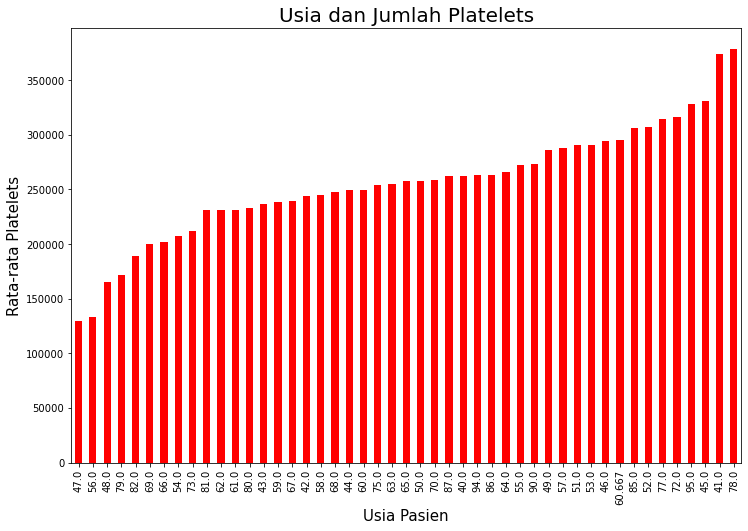

In [77]:
platelets.plot(kind='bar', figsize=(12,8), color = 'red')
plt.title('Usia dan Jumlah Platelets', fontsize=20)
plt.xlabel('Usia Pasien', fontsize = 15)
plt.ylabel('Rata-rata Platelets', fontsize = 15)
plt.show()

In [9]:
X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']

>Split Data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

>***Pelatihan Model: Random Forest Classifiier***

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model =  RandomForestClassifier(n_estimators=150, random_state=99)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        62
           1       0.91      0.75      0.82        28

    accuracy                           0.90        90
   macro avg       0.90      0.86      0.88        90
weighted avg       0.90      0.90      0.90        90



In [13]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative: {tn}')
print(f'False Positive: {fp}') 
print(f'False Negative: {fn}') 
print(f'True Positive: {tp}')

True Negative: 60
False Positive: 2
False Negative: 7
True Positive: 21


>***Pelatihan Model: Logistic Regression***

In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
y_pred_lr= lr_model.predict(X_test)

C:\Users\Thendro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        62
           1       0.76      0.46      0.58        28

    accuracy                           0.79        90
   macro avg       0.78      0.70      0.72        90
weighted avg       0.79      0.79      0.77        90



In [16]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative: {tn}')
print(f'False Positive: {fp}') 
print(f'False Negative: {fn}') 
print(f'True Positive: {tp}')

True Negative: 58
False Positive: 4
False Negative: 15
True Positive: 13


>***Pelatihan Model: Gradient Boosting Classifiier***

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_gb=gb_model.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        62
           1       0.88      0.79      0.83        28

    accuracy                           0.90        90
   macro avg       0.89      0.87      0.88        90
weighted avg       0.90      0.90      0.90        90



In [19]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred_gb)
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative: {tn}')
print(f'False Positive: {fp}') 
print(f'False Negative: {fn}') 
print(f'True Positive: {tp}')

True Negative: 59
False Positive: 3
False Negative: 6
True Positive: 22


>***Pelatihan Model: Voting Classifiier***

In [20]:
from sklearn.ensemble import VotingClassifier

v_model = VotingClassifier([('clr1', lr_model),('clr2', rf_model),('clr3', gb_model)], voting='soft')
v_model.fit(X_train, y_train)
y_pred_v=v_model.predict(X_test)

C:\Users\Thendro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
print(classification_report(y_test, y_pred_v))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        62
           1       0.82      0.64      0.72        28

    accuracy                           0.84        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.84      0.84      0.84        90



In [22]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred_v)
tn, fp, fn, tp = matrix.ravel()
print(f'True Negative: {tn}')
print(f'False Positive: {fp}') 
print(f'False Negative: {fn}') 
print(f'True Positive: {tp}')

True Negative: 58
False Positive: 4
False Negative: 10
True Positive: 18


>**Kesimipulan: akurasi skor yang divoting yang dihasilkan mencapai 84%***

In [23]:
print(f'Accuracy Score Logistic Regression:{accuracy_score(y_test, y_pred_lr)}')
print(f'Accuracy Score Random Forest Classifier:{accuracy_score(y_test, y_pred_rf)}')
print(f'Accuracy Score Gradient Boosting Classifier:{accuracy_score(y_test, y_pred_gb)}')
print('space')
print(f'Accuracy Score Logistic Regression:{accuracy_score(y_test, y_pred_v)}')

Accuracy Score Logistic Regression:0.7888888888888889
Accuracy Score Random Forest Classifier:0.9
Accuracy Score Gradient Boosting Classifier:0.9
space
Accuracy Score Logistic Regression:0.8444444444444444


Disini dapat kita simpulkan hasil yang didapatkan tidak semaksimal mungkin, oleh karena itu kita akan menggunakan *Hyperparameter Tuning - Grid Search* untuk mendapatkan hasil yang **skor maksimum**

>***Berikut Menggunakan Hyperparameter Tuning - grid search***

Tahap ini saya akan menggunakan 2 parameter saja, dikarenakan saya akan menggunakan *`1920` candidates*:
- *`random_state`*, Parameter ini untuk mendapatkan inisialisasi generator nomor acak internal untuk mendapatkan hasil yang konsisten.
- *`n_estimator`*, Parameter ini untuk mendapatkan jumlah pohon.

In [24]:
from sklearn.model_selection import GridSearchCV
import numpy as np

random_state_range = np.arange(5, 101, 1)
n_estimators_range = np.arange(10, 210, 10)

param_grid = {'n_estimators': n_estimators_range,  'random_state': random_state_range}

print(param_grid)

{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]), 'random_state': array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100])}


>***Grid Search: Random Forest Classifier***

In [25]:
rf_grid= GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 10, verbose=2, n_jobs=4)
rf_grid.fit(X_train, y_train) 

Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=99),
             n_jobs=4,
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]),
                         'random_state': array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100])},
             verbose=2)

In [26]:
print("The best parameters are %s with a score of %0.2f" % (rf_grid.best_params_, rf_grid.best_score_))

The best parameters are {'n_estimators': 80, 'random_state': 53} with a score of 0.87


>***Grid Search: Gradient Boosting Classifier***

In [28]:
gb_grid= GridSearchCV(estimator = gb_model, param_grid = param_grid, cv = 10, verbose=2, n_jobs=4)
gb_grid.fit(X_train, y_train) 

Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]),
                         'random_state': array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100])},
             verbose=2)

In [29]:
print("The best parameters are %s with a score of %0.2f" % (gb_grid.best_params_, gb_grid.best_score_))

The best parameters are {'n_estimators': 90, 'random_state': 24} with a score of 0.84


>***Grid Search: Voting Classifier***

In [30]:
v_grid= GridSearchCV(estimator = gb_model, param_grid = param_grid, cv = 10, verbose=2, n_jobs=4)
v_grid.fit(X_train, y_train)

Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]),
                         'random_state': array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100])},
             verbose=2)

In [31]:
print("The best parameters are %s with a score of %0.2f" % (v_grid.best_params_, v_grid.best_score_))

The best parameters are {'n_estimators': 90, 'random_state': 24} with a score of 0.84


>***Kesimpulan***

Data Pasien memiliki input yang sekit mengakibatkan hasil proses klasifikasi tidak maksimal. Pada klasifikasi algoritma Logistik Regression mendapatkan akurasi mencapai *`79%`*. 

Pada Kasus ini, kita dapat menggunakan klasifikasi dari ensemble classifier untuk mendapatkan, hasil yang stabil. Namun akurasi skor prediksi yang dihasilan mendapatkan *`88%` - `90%`*.

Pada kasus ini memungkinkan kita untuk memaksimalkan best akurasi klasifikasi dengan mengunakan Hyperparameter - grid search: Hasil best akurasi gradient boosting classier mendapatkan hasil turun menjadi *`84%`*, namun hasil ini juga sama dengan hasil best akurasi dari voting classifier.